## Read data from the file

In [103]:
import json
import gensim
import pandas as pd

file_path = './../res/aylien_covid_news_mar_may.jsonl'
number_of_entities = 136402

res = []
with open(file_path, 'r', encoding='utf-8') as json_file:
    for i in range(0, number_of_entities):
        current_line = json_file.readline()
        json_line = json.loads(current_line)
        res.append(json_line['body'])

df = pd.DataFrame(res)

# data = df.drop(columns=['title', 'categories', 'id', 'words_count', 'author', 'characters_count', 'entities', 'hashtags', 'keywords', 'language', 'links', 'media', 'paragraphs_count', 'published_at', 'sentences_count', 'sentiment', 'social_shares_count', 'source', 'summary'])
data = df.rename(columns={0: 'body'})

pd.set_option('display.max_colwidth', 65)
data.head()

,0
0,"On Sunday, British Prime Minister Boris Johnson was hospitali..."
1,Local tourists pose by crosses before a re-enactment of the c...
2,SINGAPORE — Here is a round-up of sports events and developme...
3,"As the novel coronavirus, COVID-19, continues to see rises in..."
4,Two more cases of coronavirus in Tasmania have been linked to...


In [108]:
data = data.rename(columns={0: 'body'})

## Remove punctuation

In [109]:
import string

def remove_punctuation(text):
    return "".join([char for char in text if char not in string.punctuation])

data['no_punctuation'] = data['body'].apply(lambda entry: remove_punctuation(entry))

data.head()

,body,no_punctuation
0,"On Sunday, British Prime Minister Boris Johnson was hospitali...",On Sunday British Prime Minister Boris Johnson was hospitaliz...
1,Local tourists pose by crosses before a re-enactment of the c...,Local tourists pose by crosses before a reenactment of the cr...
2,SINGAPORE — Here is a round-up of sports events and developme...,SINGAPORE — Here is a roundup of sports events and developmen...
3,"As the novel coronavirus, COVID-19, continues to see rises in...",As the novel coronavirus COVID19 continues to see rises in ca...
4,Two more cases of coronavirus in Tasmania have been linked to...,Two more cases of coronavirus in Tasmania have been linked to...


## Tokenize

In [110]:
from nltk.tokenize import word_tokenize

data['tokenized'] = data['no_punctuation'].apply(lambda entry: word_tokenize(entry.lower()))

data.head()

,body,no_punctuation,tokenized
0,"On Sunday, British Prime Minister Boris Johnson was hospitali...",On Sunday British Prime Minister Boris Johnson was hospitaliz...,"[on, sunday, british, prime, minister, boris, johnson, was, h..."
1,Local tourists pose by crosses before a re-enactment of the c...,Local tourists pose by crosses before a reenactment of the cr...,"[local, tourists, pose, by, crosses, before, a, reenactment, ..."
2,SINGAPORE — Here is a round-up of sports events and developme...,SINGAPORE — Here is a roundup of sports events and developmen...,"[singapore, —, here, is, a, roundup, of, sports, events, and,..."
3,"As the novel coronavirus, COVID-19, continues to see rises in...",As the novel coronavirus COVID19 continues to see rises in ca...,"[as, the, novel, coronavirus, covid19, continues, to, see, ri..."
4,Two more cases of coronavirus in Tasmania have been linked to...,Two more cases of coronavirus in Tasmania have been linked to...,"[two, more, cases, of, coronavirus, in, tasmania, have, been,..."


## Remove stopwords

In [111]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

def remove_stopwords(tokenized_text):
    return [word for word in tokenized_text if word not in stopwords]

data['no_stopwords'] = data['tokenized'].apply(lambda entry: remove_stopwords(entry))

clean_data = data.drop(columns=['body', 'no_punctuation', 'tokenized'])
clean_data.rename(columns={'no_stopwords': 'body'}, inplace=True)
clean_data.head()

,body
0,"[sunday, british, prime, minister, boris, johnson, hospitaliz..."
1,"[local, tourists, pose, crosses, reenactment, crucifixion, je..."
2,"[singapore, roundup, sports, events, developments, past, week..."
3,"[novel, coronavirus, covid19, continues, see, rises, cases, d..."
4,"[two, cases, coronavirus, tasmania, linked, outbreak, hospita..."


## Lemmatize

In [112]:
from nltk import WordNetLemmatizer

wn = WordNetLemmatizer()

def lemmatize(tokenized_text):
    return [wn.lemmatize(word) for word in tokenized_text]

clean_data['lemmatized'] = clean_data['body'].apply(lambda entry: lemmatize(entry))
clean_data.head()

,body,lemmatized
0,"[sunday, british, prime, minister, boris, johnson, hospitaliz...","[sunday, british, prime, minister, boris, johnson, hospitaliz..."
1,"[local, tourists, pose, crosses, reenactment, crucifixion, je...","[local, tourist, pose, cross, reenactment, crucifixion, jesus..."
2,"[singapore, roundup, sports, events, developments, past, week...","[singapore, roundup, sport, event, development, past, week, 3..."
3,"[novel, coronavirus, covid19, continues, see, rises, cases, d...","[novel, coronavirus, covid19, continues, see, rise, case, dea..."
4,"[two, cases, coronavirus, tasmania, linked, outbreak, hospita...","[two, case, coronavirus, tasmania, linked, outbreak, hospital..."


In [73]:
## Remove tokens without any real meaning

In [113]:
meaningless_words = ['say', 'said', 'can', 'could', 'would', 'go', 'going', 'like', 'also', 'new', 'one', 'per', '—', '’', '‘', '”', '“', 'pm', 'am', 'u', 'nh', 'r', 'v', 'mr', 'apr']
3
def remove_meaningless_words(lemmatized_text):
    return [word for word in lemmatized_text if word not in meaningless_words]

clean_data['lemmatized'] = clean_data['lemmatized'].apply(lambda entry: remove_meaningless_words(entry))
clean_data.head()

,body,lemmatized
0,"[sunday, british, prime, minister, boris, johnson, hospitaliz...","[sunday, british, prime, minister, boris, johnson, hospitaliz..."
1,"[local, tourists, pose, crosses, reenactment, crucifixion, je...","[local, tourist, pose, cross, reenactment, crucifixion, jesus..."
2,"[singapore, roundup, sports, events, developments, past, week...","[singapore, roundup, sport, event, development, past, week, 3..."
3,"[novel, coronavirus, covid19, continues, see, rises, cases, d...","[novel, coronavirus, covid19, continues, see, rise, case, dea..."
4,"[two, cases, coronavirus, tasmania, linked, outbreak, hospita...","[two, case, coronavirus, tasmania, linked, outbreak, hospital..."


## Show most common words

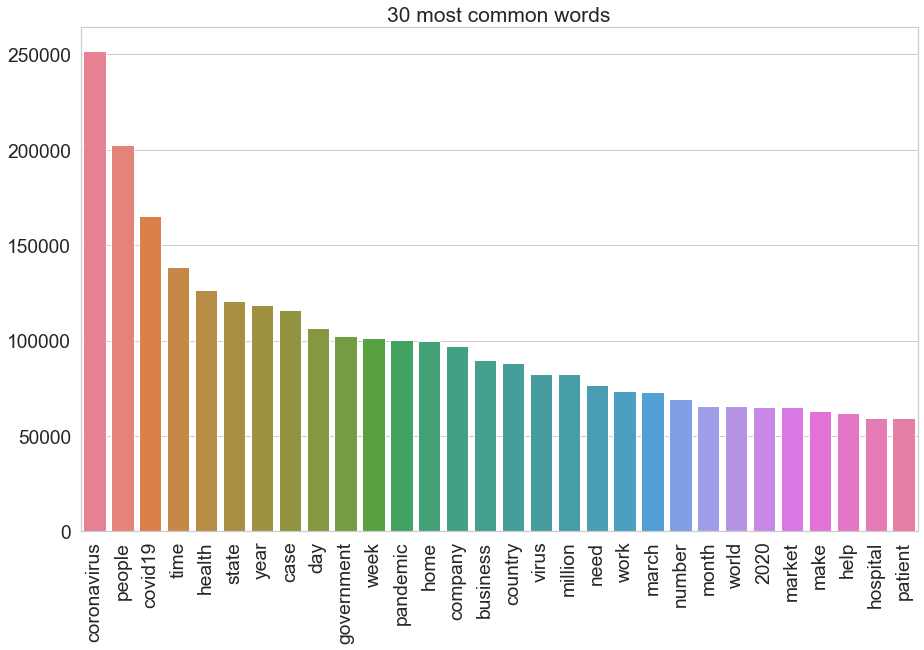

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

def plot_most_common_words(show_words_count, count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:show_words_count]
    
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    
    plt.subplot(title=str(show_words_count) + ' most common words')
    
    sns.set_context("notebook", font_scale=1.75, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
clean_data_text = clean_data['lemmatized'].apply(lambda entry: " ".join(entry))
count_data = count_vectorizer.fit_transform(clean_data_text)
# Visualise the 10 most common words
plot_most_common_words(30, count_data, count_vectorizer)

## LDA

In [115]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(clean_data['lemmatized'])
corpus = [id2word.doc2bow(text) for text in clean_data['lemmatized']]

lda_model = gensim.models.LdaMulticore(workers=3,
                                       corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20,
                                       chunksize=12500,
                                       passes=10,
                                       per_word_topics=True)
from pprint import pprint

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.016*"event" + 0.009*"ship" + 0.009*"cruise" + 0.008*"2020" + '
  '0.008*"march" + 0.007*"music" + 0.006*"coronavirus" + 0.006*"show" + '
  '0.006*"festival" + 0.006*"april"'),
 (1,
  '0.012*"government" + 0.010*"country" + 0.010*"coronavirus" + '
  '0.007*"lockdown" + 0.007*"minister" + 0.006*"measure" + 0.006*"march" + '
  '0.006*"quarantine" + 0.005*"italy" + 0.005*"philippine"'),
 (2,
  '0.014*"player" + 0.014*"league" + 0.011*"season" + 0.011*"game" + '
  '0.010*"club" + 0.009*"sport" + 0.008*"team" + 0.007*"football" + '
  '0.006*"coronavirus" + 0.005*"match"'),
 (3,
  '0.010*"court" + 0.010*"state" + 0.008*"police" + 0.007*"election" + '
  '0.005*"biden" + 0.005*"voter" + 0.004*"law" + 0.004*"sander" + '
  '0.004*"prison" + 0.004*"campaign"'),
 (4,
  '0.012*"market" + 0.009*"price" + 0.008*"oil" + 0.008*"year" + '
  '0.007*"coronavirus" + 0.007*"billion" + 0.006*"company" + 0.006*"economy" + '
  '0.006*"bank" + 0.005*"million"'),
 (5,
  '0.035*"china" + 0.016*"chinese" 

In [116]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=clean_data['lemmatized'], 
                                     dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5177574415635771


In [ ]:
# define a couple of constants which we will use for the training of the model

const_workers = 3
const_chunksize = 12500
const_passes = 10

In [117]:
def get_coherence_values_topics(dictionary, corpus, texts, coherence_measure, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.LdaMulticore(workers=3,
                                       chunksize=12500,
                                       passes=10,
                                       num_topics=num_topics,
                                       id2word=dictionary,
                                       corpus=corpus,
                                       per_word_topics=True)
        model_list.append(lda_model)
        
        coherencemodel = CoherenceModel(model=lda_model, 
                                        dictionary=dictionary, 
                                        texts=texts, 
                                        coherence=coherence_measure)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

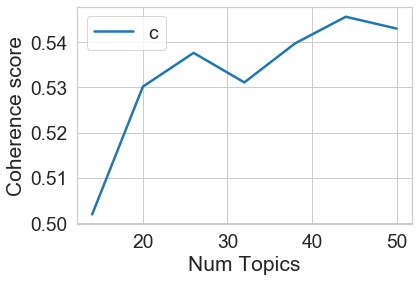

In [118]:
start = 14
limit = 51
step = 6

model_list, coherence_values = get_coherence_values_topics(dictionary=id2word, 
                                                           corpus=corpus, 
                                                           texts=clean_data['lemmatized'], 
                                                           start=start, 
                                                           limit=limit, 
                                                           step=step, 
                                                           coherence_measure='c_v')
# Show graph, higher is better
import matplotlib.pyplot as plt

x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
start = 2
limit = 51
step = 6

model_list, coherence_values = get_coherence_values_topics(dictionary=id2word, 
                                                           corpus=corpus, 
                                                           texts=clean_data['lemmatized'], 
                                                           start=start, 
                                                           limit=limit, 
                                                           step=step, 
                                                           coherence_measure='u_mass')
# Show graph, higher is better
import matplotlib.pyplot as plt

x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\multiprocessing\queues.py", line 236, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "C:\Program Files\Anaconda3\lib\multiprocessing\reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
MemoryError
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\multiprocessing\queues.py", line 236, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "C:\Program Files\Anaconda3\lib\multiprocessing\reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
MemoryError
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\multiprocessing\queues.py", line 236, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "C:\Program Files\Anaconda3\lib\multiprocessing\reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
MemoryError
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\lib\multiprocessing\queues.py", line 236, in _feed
    ob

In [ ]:
print(coherence_values)

In [53]:
import numpy as np
import tqdm
from gensim.models import CoherenceModel

# supporting function
def get_coherence_values_alpha_beta(dictionary, corpus, texts, coherence_measure, num_topics, a, b):
    
    lda_model = gensim.models.LdaMulticore(workers=3,
                                           chunksize=1250,
                                           passes=10,
                                           id2word=dictionary,
                                           corpus=corpus,
                                           num_topics=num_topics,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         dictionary=dictionary, 
                                         texts=texts, 
                                         coherence=coherence_measure)
    
    return coherence_model_lda.get_coherence()

# Alpha parameters
alpha = list(np.array([0.01, 0.26, 0.51, 0.76, 1]))
# alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameters
beta = list(np.array([0.01, 0.26, 0.51, 0.76, 1]))
# beta.append('symmetric')

model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take anywhere between 2 and 15 hours to run depending on the size of the corpus
# and the hardware capabilities of the system
if 1 == 1:
    total = np.shape(alpha)[0] * np.shape(beta)[0]
    pbar = tqdm.tqdm(total=total)
    
    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            # with the chosen topic number from the previous tests
            cv = get_coherence_values_alpha_beta(dictionary=id2word, 
                                                 corpus=corpus, 
                                                 texts=clean_data['lemmatized'], 
                                                 coherence_measure='c_v', 
                                                 num_topics=20, 
                                                 a=a, 
                                                 b=b)
            
            # Save the model results
            model_results['Topics'].append(20)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv)

            pbar.update(1)
    pd.DataFrame(model_results).to_csv('./../res/lda_tuning_results.csv', index=False)
    pbar.close()


100%|██████████| 42/42 [2:20:52<00:00, 201.26s/it]  


In [60]:
tuning_results = pd.read_csv('./../res/lda_tuning_results.csv')

tuning_results = tuning_results.sort_values(by=['Coherence'], ascending=False)
tuning_results.head()

,Topics,Alpha,Beta,Coherence
8,20,0.26,0.51,0.577224
10,20,0.26,1.0,0.570680
39,20,asymmetric,0.76,0.563319
1,20,0.01,0.26,0.537482
9,20,0.26,0.76,0.536230


In [62]:
def get_lda_model(dictionary, corpus, num_topics, a, b):
    lda_model = gensim.models.LdaMulticore(workers=3,
                                           chunksize=1250,
                                           passes=10,
                                           id2word=dictionary,
                                           corpus=corpus,
                                           num_topics=num_topics,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    return lda_model

In [64]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(get_lda_model(dictionary=id2word,
                                                        corpus=corpus,
                                                        num_topics=20,
                                                        a=0.26, 
                                                        b=0.51), 
                                          corpus, 
                                          id2word)
LDAvis_prepared

C:\Program Files\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.303672 -0.023219       1        1  24.978710
10     0.251940  0.066856       2        1  23.005751
1      0.253699  0.024266       3        1  16.586279
14     0.251505 -0.161645       4        1  14.001006
15     0.189448  0.103433       5        1   8.614103
9      0.063141  0.128690       6        1   3.837960
13     0.035613 -0.064851       7        1   1.959039
19    -0.017638 -0.060362       8        1   1.691813
0     -0.014906 -0.036562       9        1   1.312679
6     -0.089501 -0.013191      10        1   0.893257
11    -0.096159  0.029474      11        1   0.834053
5     -0.104031  0.012828      12        1   0.536194
2     -0.112621 -0.004396      13        1   0.512708
4     -0.127517  0.002251      14        1   0.293474
18    -0.130093 -0.000531      15        1   0.208404
7     -0.130955 -0.000857      16        1   0.179124
12    -0.129854 -0.002097      17        1   0.150676
17    -0.132072  0.000402      18        1   0.143289
3     -0.132000 -0.000330      19        1   0.142947
8     -0.131670 -0.000159      20        1   0.118530, topic_info=      Category          Freq      Term         Total  loglift  logprob
122    Default  10924.000000      case  10924.000000  30.0000  30.0000
49     Default   3993.000000  minister   3993.000000  29.0000  29.0000
37     Default   7411.000000  hospital   7411.000000  28.0000  28.0000
83     Default   4390.000000    sunday   4390.000000  27.0000  27.0000
1917   Default   3607.000000     trump   3607.000000  26.0000  26.0000
...        ...           ...       ...           ...      ...      ...
19500  Topic20      0.232234    bombay     25.549660   2.0371  -9.6359
8675   Topic20      0.190306      rout     12.606174   2.5445  -9.8350
26323  Topic20      0.144597   satanic      6.086978   2.9978 -10.1097
18480  Topic20      0.152034   lighter     22.016647   1.7623 -10.0595
32735  Topic20      0.152107       iit     26.631662   1.5725 -10.0590

[1255 rows x 6 columns], token_table=      Topic      Freq Term
term                      
6475      1  0.104479   02
6475      2  0.052240   02
6475      3  0.287318   02
6475      4  0.235078   02
6475      5  0.117539   02
...     ...       ...  ...
1721      7  0.005522    ‘
1721      8  0.003796    ‘
1721      9  0.000690    ‘
1721     10  0.000690    ‘
1721     12  0.000345    ‘

[6040 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 11, 2, 15, 16, 10, 14, 20, 1, 7, 12, 6, 3, 5, 19, 8, 13, 18, 4, 9])